In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

In [1]:
class_names = ['ANTHRACNOSE', 'DOWNEY MILDEW', 'GOOD LEAF', 'LEAF MINER', 'SLUG INFECTED']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [3]:
Anthra=('/content/drive/MyDrive/AIML_SPINACH/TRAIN/TRAIN/ANTHRACNOSE')
Downey=('/content/drive/MyDrive/AIML_SPINACH/TRAIN/TRAIN/DOWNEY MILDEW')
Good=('/content/drive/MyDrive/AIML_SPINACH/TRAIN/TRAIN/GOOD LEAF')
Leaf=('/content/drive/MyDrive/AIML_SPINACH/TRAIN/TRAIN/LEAF MINER')
Slug=('/content/drive/MyDrive/AIML_SPINACH/TRAIN/TRAIN/SLUG INFECTED')
Train=(Anthra,Downey,Good,Leaf,Slug)
len(Train)


5

In [4]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """

    datasets = ['/content/drive/MyDrive/AIML_SPINACH/TRAIN/TRAIN', '/content/drive/MyDrive/AIML_SPINACH/VALID/VALID']
    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [5]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading /content/drive/MyDrive/AIML_SPINACH/TRAIN/TRAIN


100%|██████████| 18/18 [00:22<00:00,  1.22s/it]


Loading /content/drive/MyDrive/AIML_SPINACH/VALID/VALID


100%|██████████| 21/21 [00:19<00:00,  1.06it/s]


In [6]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

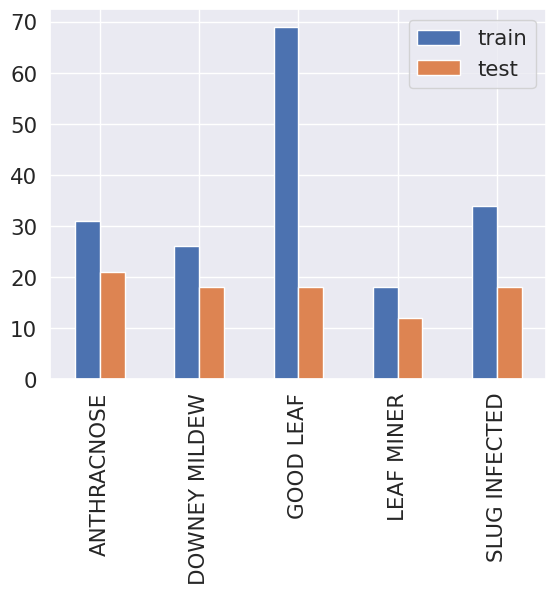

In [7]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=class_names
            ).plot.bar()
plt.show()

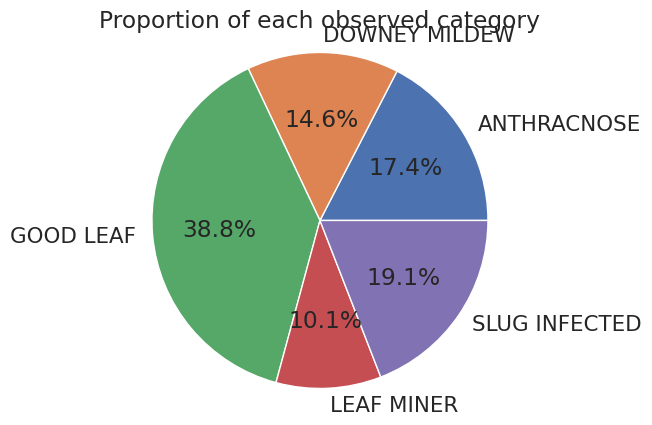

In [8]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0) ,
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [10]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """

    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

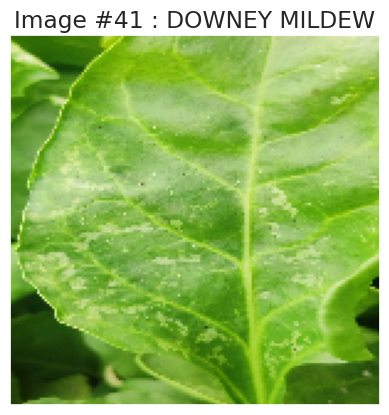

In [14]:
display_random_image(class_names, train_images, train_labels)

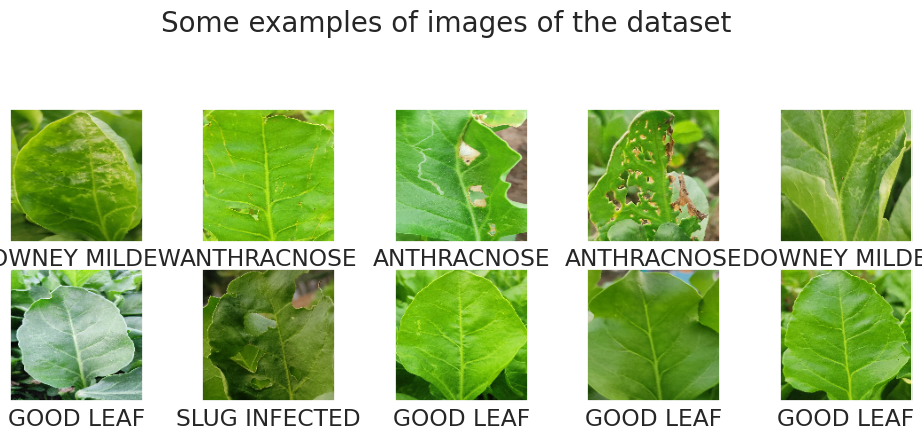

In [15]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """

    fig = plt.figure(figsize=(12,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=20)
    for i in range(10):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()
display_examples(class_names, train_images, train_labels)

In [24]:
import tensorflow.keras as models

In [25]:
import tensorflow.keras.layers as layers

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [27]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 73984)            

In [28]:
test_images.shape

(87, 150, 150, 3)

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
history = model.fit(train_images, train_labels, epochs=15,
                    validation_data=(test_images, test_labels))

Epoch 1/15
6/6 [==============================] - 13s 2s/step - loss: 2.0535 - accuracy: 0.2191 - val_loss: 1.6138 - val_accuracy: 0.2069
Epoch 2/15
6/6 [==============================] - 9s 2s/step - loss: 1.4902 - accuracy: 0.3820 - val_loss: 1.5708 - val_accuracy: 0.2184
Epoch 3/15
6/6 [==============================] - 8s 1s/step - loss: 1.4532 - accuracy: 0.3933 - val_loss: 1.5313 - val_accuracy: 0.2414
Epoch 4/15
6/6 [==============================] - 10s 2s/step - loss: 1.3532 - accuracy: 0.4438 - val_loss: 1.4472 - val_accuracy: 0.2759
Epoch 5/15
6/6 [==============================] - 7s 1s/step - loss: 1.3440 - accuracy: 0.4326 - val_loss: 1.4079 - val_accuracy: 0.4483
Epoch 6/15
6/6 [==============================] - 9s 2s/step - loss: 1.2910 - accuracy: 0.4607 - val_loss: 1.6836 - val_accuracy: 0.2644
Epoch 7/15
6/6 [==============================] - 9s 2s/step - loss: 1.2075 - accuracy: 0.6011 - val_loss: 1.1665 - val_accuracy: 0.5057
Epoch 8/15
6/6 [=======================

3/3 - 1s - loss: 0.0258 - accuracy: 1.0000 - 1s/epoch - 386ms/step


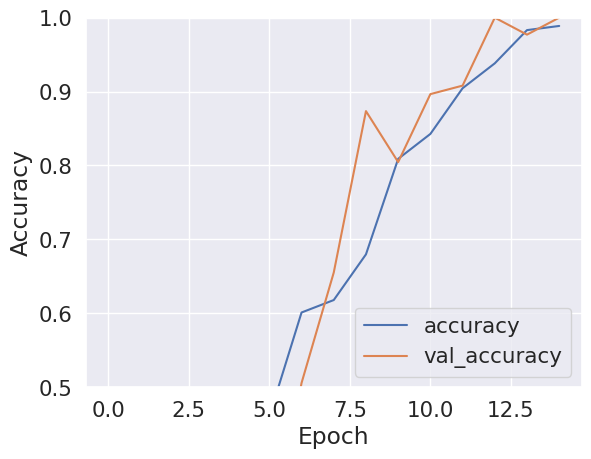

In [31]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

In [32]:
print('Test Accuracy is',test_acc)

Test Accuracy is 1.0


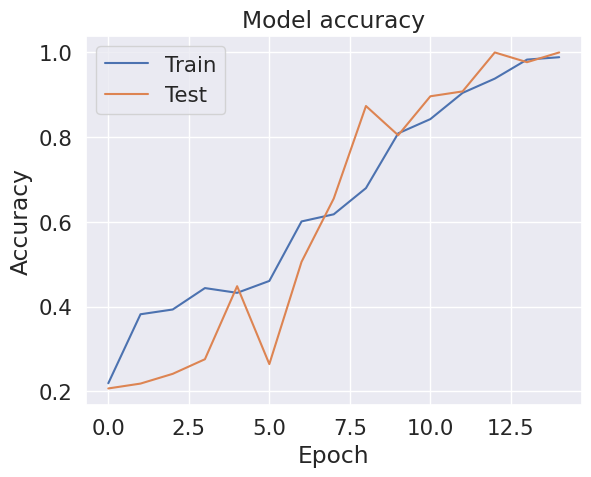

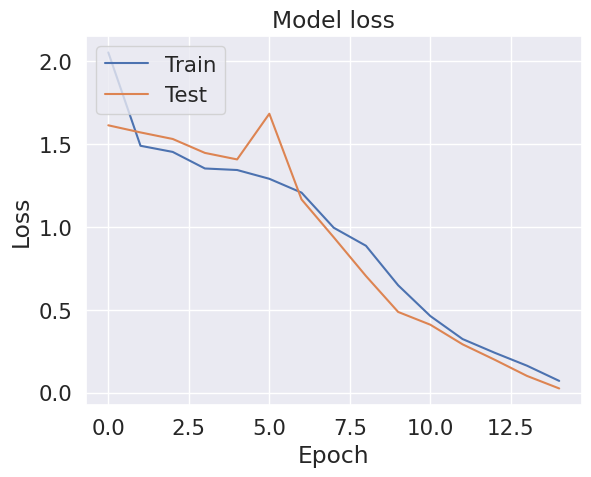

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [34]:
'''from keras.preprocessing.image import ImageDataGenerator
General_datagen = ImageDataGenerator(rescale=1./255, )
test_data = General_datagen.flow_from_directory('SPINACH/TEST/', target_size=(150,150),)
print(test_data)
print('data groups:', len(test_data))

'''

"from keras.preprocessing.image import ImageDataGenerator\nGeneral_datagen = ImageDataGenerator(rescale=1./255, )\ntest_data = General_datagen.flow_from_directory('SPINACH/TEST/', target_size=(150,150),)\nprint(test_data)\nprint('data groups:', len(test_data))\n\n"

In [35]:
def tst_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """

    datasets = ['/content/drive/MyDrive/AIML_SPINACH/VALID/VALID','/content/drive/MyDrive/AIML_SPINACH/TRAIN/TRAIN']
    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [36]:
(dummy_DATA, dummydata_LBS),(test_data, testdata_labels) = tst_data()

Loading /content/drive/MyDrive/AIML_SPINACH/VALID/VALID


100%|██████████| 21/21 [00:02<00:00,  8.61it/s]


Loading /content/drive/MyDrive/AIML_SPINACH/TRAIN/TRAIN


100%|██████████| 18/18 [00:01<00:00, 12.71it/s]


In [37]:
test_data=test_data/255

In [38]:
from sklearn.metrics import accuracy_score

prediction = model.predict(test_data)
pred_label = np.argmax(prediction, axis = 1)
pred_label

6/6 [==============================] - 3s 505ms/step


array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

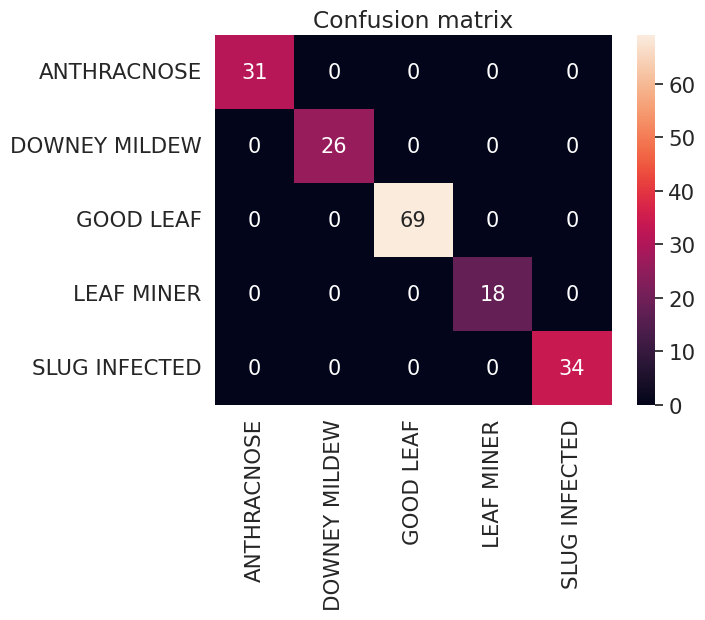

In [39]:
CM = confusion_matrix(testdata_labels, pred_label)
ax = plt.axes()
sn.heatmap(CM, annot=True,
           annot_kws={"size": 15},
           xticklabels=class_names,
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [40]:
predictions = model.predict(test_data)     # Vector of probabilities
predictions

6/6 [==============================] - 2s 342ms/step


array([[-3.50483119e-01,  2.04121804e+00, -7.84892082e-01,
        -1.67334354e+00,  5.42645502e+00],
       [ 1.98709142e+00,  1.10096073e+00, -1.83755088e+00,
        -6.47729337e-01,  5.75787449e+00],
       [-1.37306154e+00, -6.10691905e-01,  1.00537908e+00,
        -7.07483470e-01,  2.88730192e+00],
       [-4.79615831e+00, -1.38769615e+00,  1.29043603e+00,
         1.58234882e+00,  9.09076118e+00],
       [ 1.22106683e+00, -1.49746835e+00,  1.42748845e+00,
        -9.91890252e-01,  8.20319176e+00],
       [ 3.02549183e-01,  1.35109627e+00, -2.53687352e-01,
        -4.23272640e-01,  3.97653484e+00],
       [ 3.30096030e+00,  1.81033885e+00, -5.01704407e+00,
         1.67128968e+00,  1.23433046e+01],
       [-4.00507033e-01,  3.33942950e-01,  4.24297974e-02,
        -6.77307904e-01,  4.96429110e+00],
       [-3.94192994e-01, -8.43128026e-01,  2.07031846e+00,
        -2.77979279e+00,  7.36472464e+00],
       [-7.07135630e+00,  2.11804891e+00, -8.71136844e-01,
         3.09787363e-01

In [41]:
pred_labels = np.argmax(predictions, axis = 1)
pred_labels


array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(pred_labels,testdata_labels)
print(classification_report(pred_labels,testdata_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        69
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        34

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



6/6 [==============================] - 3s 498ms/step


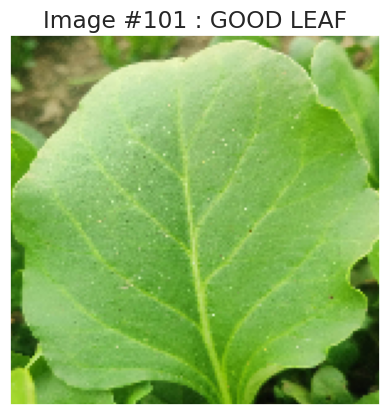

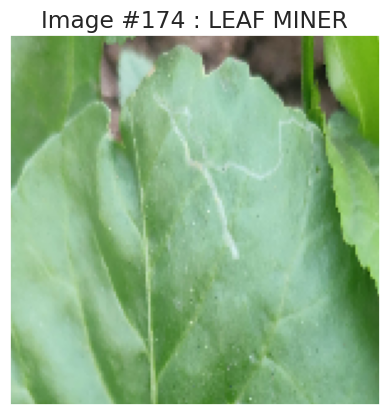

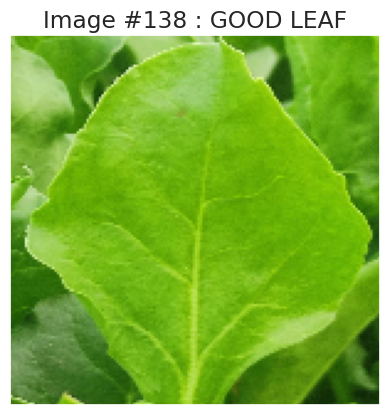

In [46]:
predictions = model.predict(test_data)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

for i in range(3):
    display_random_image(class_names, test_data, pred_labels)

In [53]:
# Assuming your model is named 'model'
model.save('model_tf')


In [52]:
# Load the saved model
#loaded_model = tf.keras.models.load_model('model_tf')
